In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


## Read in Data
flight = pd.read_csv("flights.csv")
perc = 0.1
flight = flight.sample(n = int(flight.shape[0]*perc)) #recorto datos para no trabar a la compu de manera aleatoria
print(flight.head())
print(flight.info())


       miles  passengers  delay inflight_meal inflight_entertainment  \
30131   1965         212     11            No                    Yes   
88444   2429         197     11            No                     No   
9080    1677         213      0           Yes                     No   
97314   1805         213      9            No                    Yes   
87961    596         203      6            No                    Yes   

      inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
30131           Yes      Sunday     No     Yes      399.295           1456.04   
88444           Yes      Sunday     No     Yes      373.705           1552.30   
9080            Yes      Friday     No     Yes      312.755           1495.09   
97314           Yes    Saturday     No     Yes      395.725           1552.69   
87961           Yes   Wednesday     No      No      271.120           1186.72   

       hours  
30131      4  
88444      4  
9080       3  
97314      3  
87961

In [43]:
#análisis price coach -> una variable cuantitativa
min_coach = flight.coach_price.min()
max_coach = flight.coach_price.max()
avg_coach = flight.coach_price.mean()
flight_rounded = flight.apply(lambda row: row['coach_price'] // 10 * 10, axis=1)
mod_coach_rounded = flight_rounded.mode()
print(min_coach)
print(max_coach)
print(avg_coach)
print(mod_coach_rounded)

92.14
585.96
376.64978617660654
0    410.0
dtype: float64


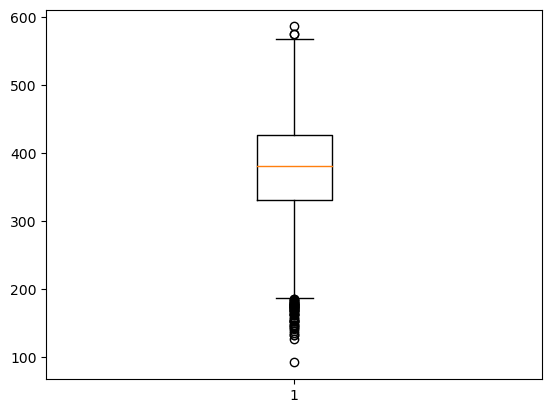

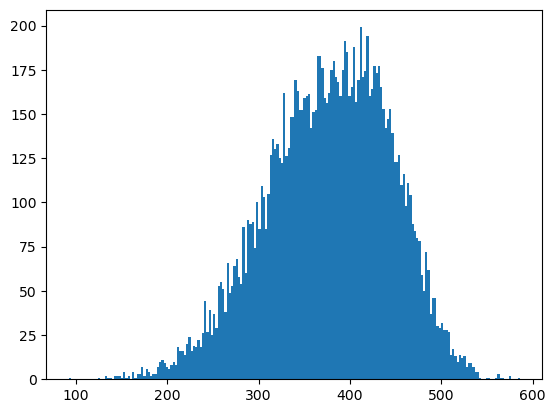

<Figure size 640x480 with 0 Axes>

In [44]:
plt.boxplot(flight.coach_price)
plt.show()
plt.clf()
plt.hist(flight.coach_price, bins=200)#bins indica cuantas barras mostrar
plt.show()
plt.clf()
#se puede ver facilmente que 500 pesos es un boleto caro para esta clase

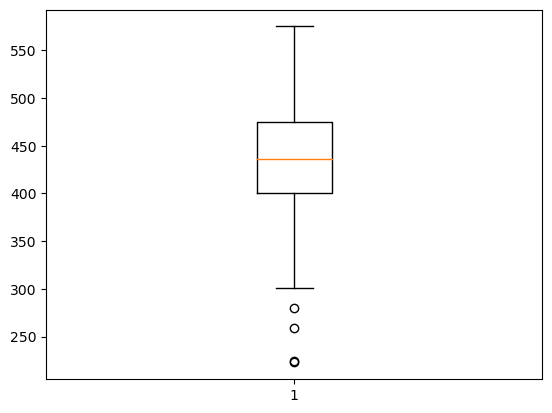

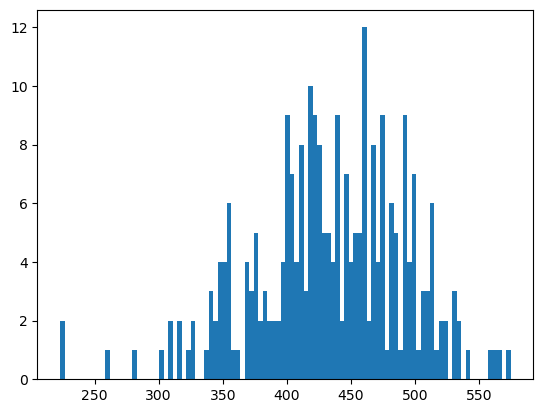

222.98
574.855
433.45486590038314
0    410.0
dtype: float64


<Figure size 640x480 with 0 Axes>

In [45]:
prices_8_long = flight.coach_price[flight.hours == 8]
plt.boxplot(prices_8_long)
plt.show()
plt.clf()
plt.hist(prices_8_long, bins=100)#bins indica cuantas barras mostrar
plt.show()
plt.clf()
min_coach = prices_8_long.min()
max_coach = prices_8_long.max()
avg_coach = prices_8_long.mean()
prices_8_long_rounded = prices_8_long.apply(lambda price: price // 10 * 10)
mod_coach_rounded = flight_rounded.mode()
print(min_coach)
print(max_coach)
print(avg_coach)
print(mod_coach_rounded)
#500 no es zarpado pero sigue siendo caro

12978


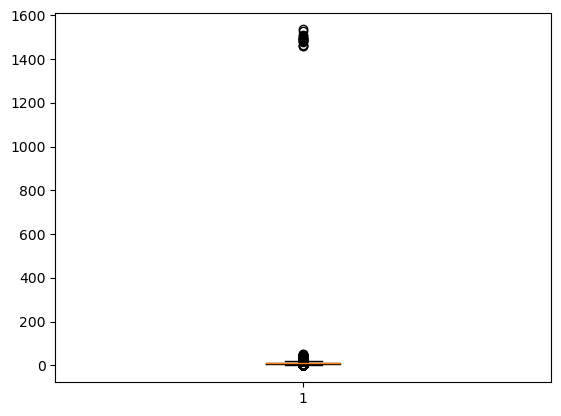

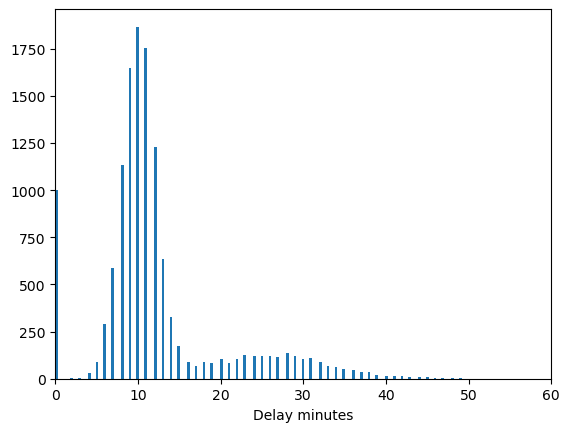

<Figure size 640x480 with 0 Axes>

In [46]:
delay = flight['delay']
print(len(delay))
plt.boxplot(delay)
plt.show()
plt.clf()
plt.hist(delay, bins=5000)#bins indica cuantas barras mostrar
plt.xlim(0,60)
plt.xlabel("Delay minutes")
plt.show()
plt.clf()

12959


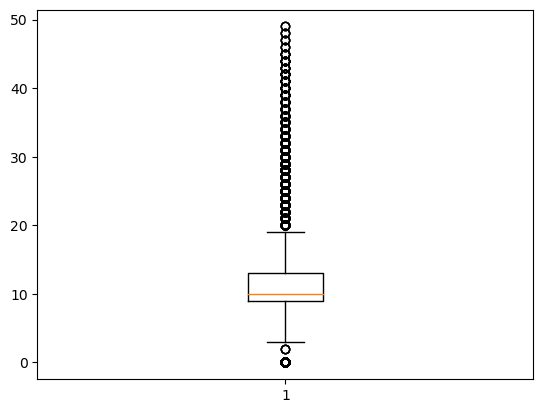

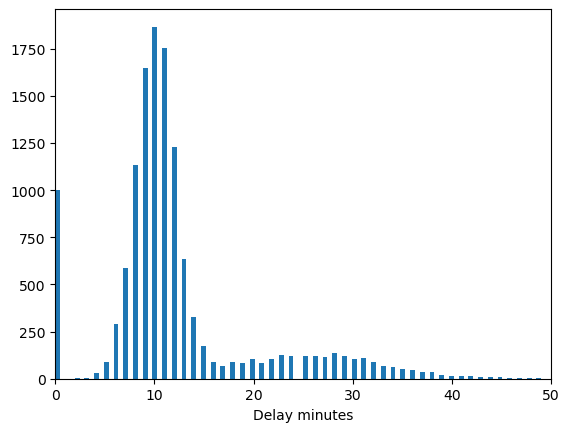

<Figure size 640x480 with 0 Axes>

In [47]:
large_delays = flight.delay[flight['delay']<50]
print(len(large_delays))
plt.boxplot(large_delays)
plt.show()
plt.clf()
plt.hist(large_delays, bins=100)#bins indica cuantas barras mostrar
plt.xlim(0,50)
plt.xlabel("Delay minutes")
plt.show()
plt.clf()

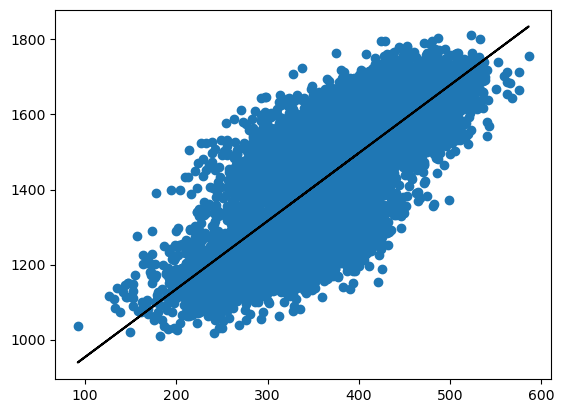

<Figure size 640x480 with 0 Axes>

In [48]:
import statsmodels.api as sm
model = sm.OLS.from_formula('firstclass_price~ coach_price', data = flight) #creamos una matriz que no vemos
results = model.fit()
plt.scatter(flight.coach_price, flight.firstclass_price)
plt.plot(flight.coach_price, results.predict(flight), color='black') #esta línea traza la línea que representa la media
plt.show()
plt.clf()
#tmb lo podía hacer con sns.lmplot(x = x_var, y = y_var, data = flight, line_kws={'color': 'black'}, lowess=True)

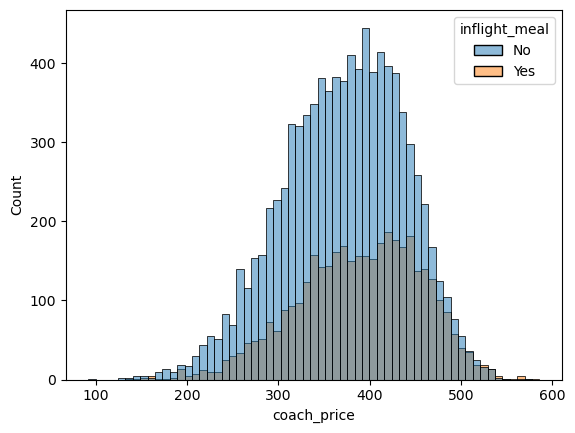

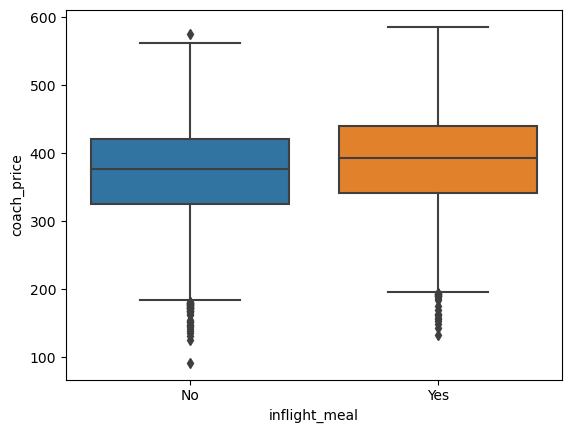

<Figure size 640x480 with 0 Axes>

In [49]:
#tarea 5: cuantitativo + categórico: 
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()
sns.boxplot(x='inflight_meal', y='coach_price', data=flight)
plt.show()
plt.clf()

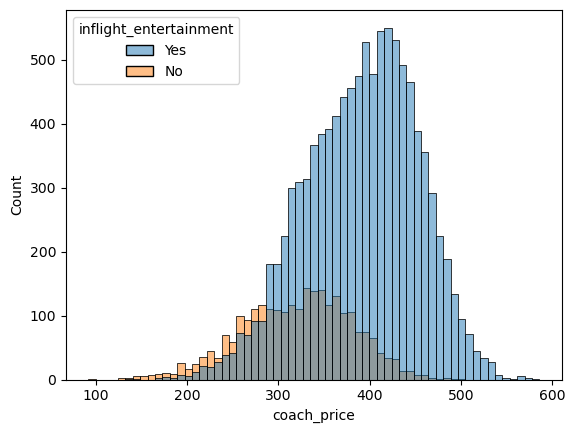

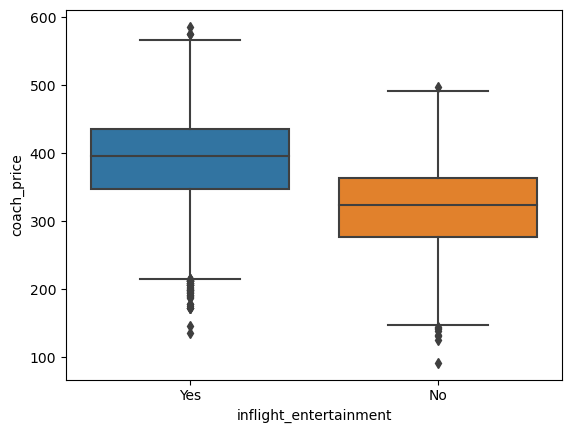

<Figure size 640x480 with 0 Axes>

In [50]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight)
plt.show()
plt.clf()

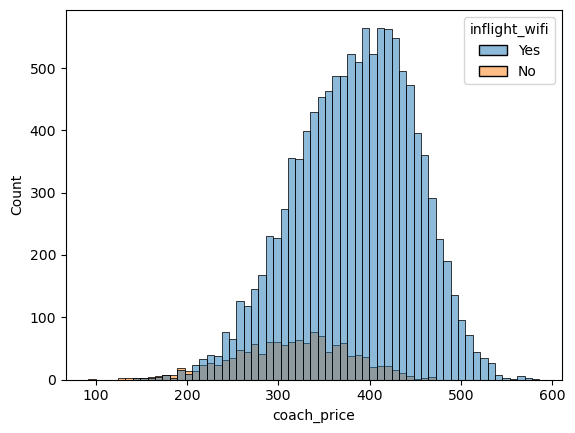

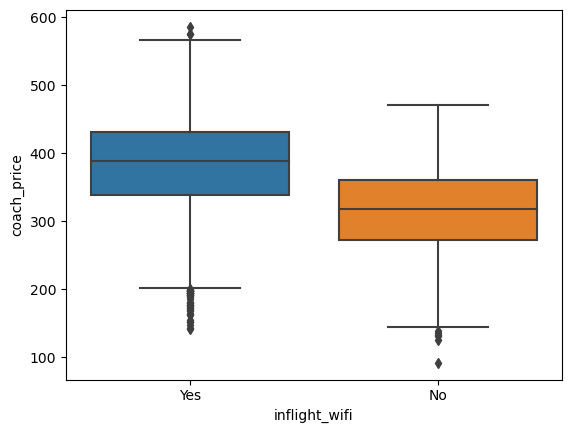

<Figure size 640x480 with 0 Axes>

In [51]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight)
plt.show()
plt.clf()
#el inflight meal es el más asociado a precios elevados

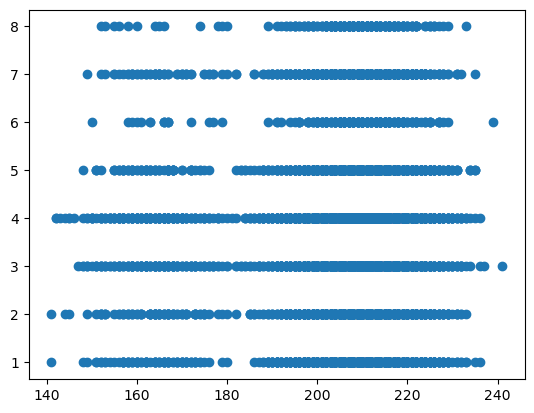

<Figure size 640x480 with 0 Axes>

In [52]:
#passengers vs lenght of flight -> 2 cuantitativas, ambas discretas
plt.scatter(flight.passengers, flight.hours)
plt.show()
plt.clf()

C:\Users\Mateo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


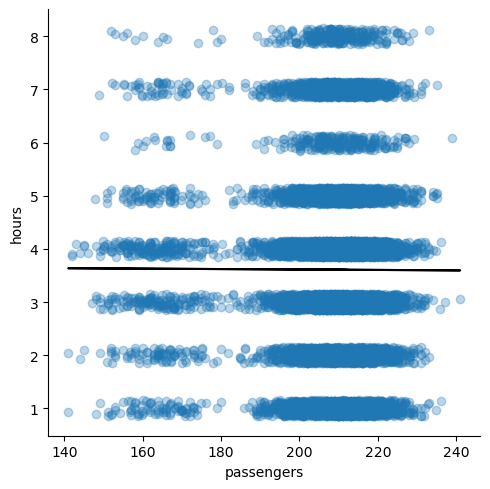

<Figure size 640x480 with 0 Axes>

In [53]:
#mejoremos lo anterior:
model = sm.OLS.from_formula('hours~ passengers', data = flight) 
results = model.fit()
sns.lmplot(x='passengers', y='hours', data = flight, x_jitter = .15, y_jitter = .15, fit_reg = False, scatter_kws={'alpha':0.3})
plt.plot(flight.passengers, results.predict(flight), color='black')
plt.show()
plt.clf()#los vuelos más largos no influyen en la cantidad de pasajeros

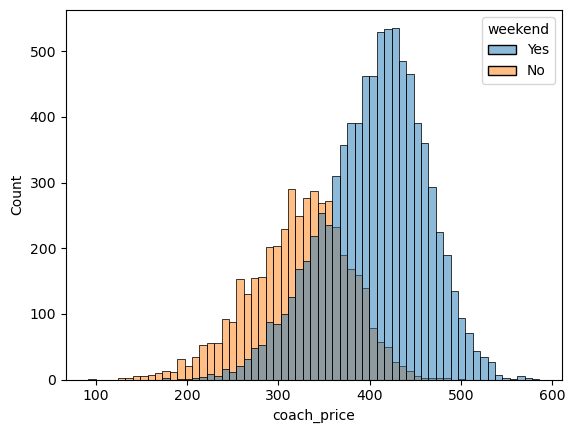

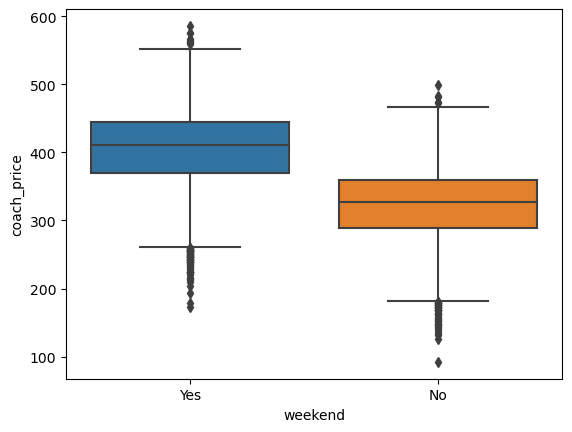

<Figure size 640x480 with 0 Axes>

In [54]:
#coach prices on weekends compared to weekdays. cuantitativa vs cualitativa
sns.histplot(flight, x = "coach_price", hue = flight.weekend)
plt.show()
plt.clf()
sns.boxplot(x='weekend', y='coach_price', data=flight)
plt.show()
plt.clf()

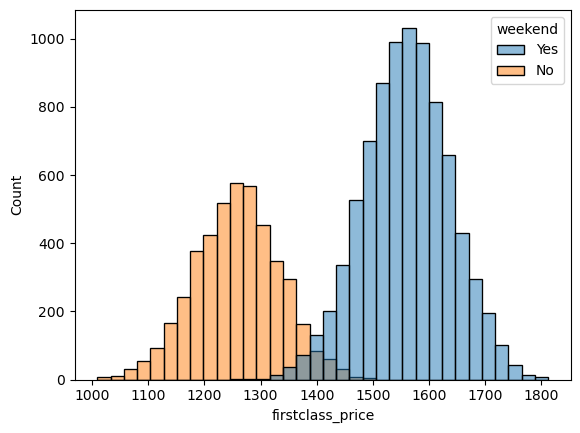

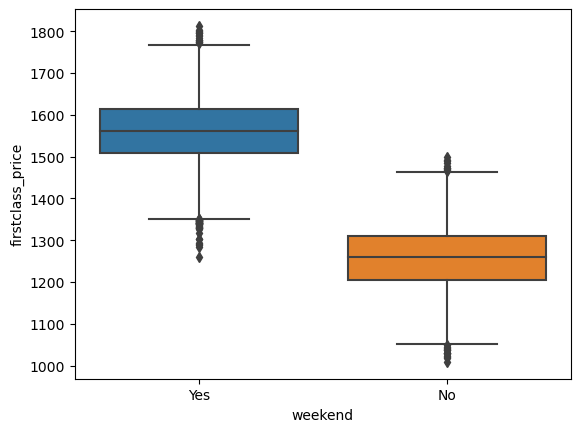

<Figure size 640x480 with 0 Axes>

In [55]:
#coach prices on weekends compared to weekdays. cuantitativa vs cualitativa
sns.histplot(flight, x = "firstclass_price", hue = flight.weekend)
plt.show()
plt.clf()
sns.boxplot(x='weekend', y='firstclass_price', data=flight)
plt.show()
plt.clf()#los vuelos de 1ra clase suben mucho en los findesemanas a comparación de los vuelos en la categoría normal

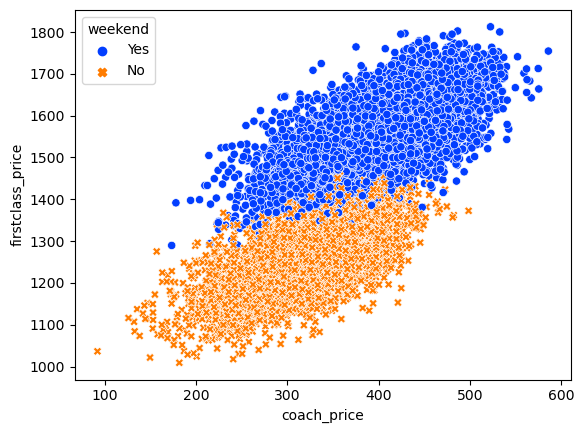

<Figure size 640x480 with 0 Axes>

In [56]:
#analizaremos lo mismo pero todas las variables juntas. prices en un scatter plot diferenciando si es un fin de samana o no con colores
sns.scatterplot(x ='coach_price', y ='firstclass_price', hue ='weekend', style ='weekend', palette ='bright', data =flight)
plt.show()#diferencio el día de la semana por color y forma para hacer énfasis
plt.clf()
#ahora llegamos a la misma conclusión de que en los findesemanas los vuelos de 1ra aumentan aún más sus precios (lo azul va más hacia arriba)
#además, sabemos que ambas categorías son más caras en los fin de semanas

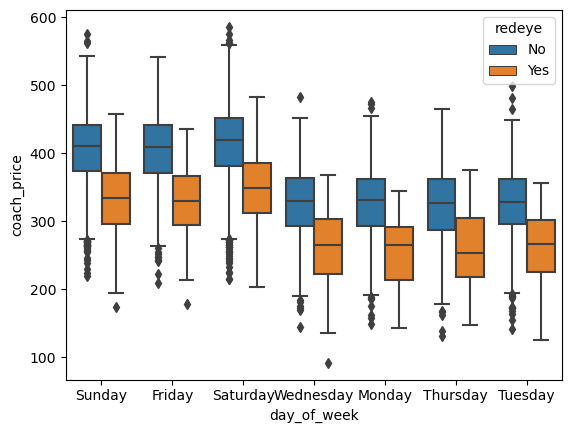

<Figure size 640x480 with 0 Axes>

In [61]:
#redeyee bianario -> lo diferenciamos con colores
#coach_price vs day of week. cuantitativa vs cualitativa -> cajas o histogramas superpuestos (serían muchos histogramas superpuestos)
sns.boxplot(x='day_of_week', y='coach_price', hue='redeye', data=flight)
plt.show()
plt.clf()
#volar de noche es más barato para cualquier día de la semana